In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
    
# splitting the data into train, validation and test
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.25, random_state=0)

print('--TRAIN SET --', X_train.shape, y_train.shape)
print('--VALIDATION SET--', X_valid.shape, y_valid.shape)
print('--TEST SET--', X_test.shape, y_test.shape)

--TRAIN SET -- (42000, 719) (42000,)
--VALIDATION SET-- (14000, 719) (14000,)
--TEST SET-- (14000, 719) (14000,)


In [3]:
scale_acc = []
auto_acc = []

for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for gam in ['scale', 'auto']:
        svm = SVC(C=c, kernel='rbf', gamma=gam)
        scores = cross_val_score(svm, X_valid, y_valid, cv = 10, n_jobs = -1, verbose  = 0)
        validation_accuracy = scores.mean()
        
        print(f'C: {c} --- Gamma : {gam} --- CV accuracy: {validation_accuracy}')
        
        if gam == 'scale':
            scale_acc.append(validation_accuracy)
        else:
            auto_acc.append(validation_accuracy)

C: 0.0001 --- Gamma : scale --- CV accuracy: 0.10957142857142858
C: 0.0001 --- Gamma : auto --- CV accuracy: 0.10957142857142858
C: 0.001 --- Gamma : scale --- CV accuracy: 0.10957142857142858
C: 0.001 --- Gamma : auto --- CV accuracy: 0.10957142857142858
C: 0.01 --- Gamma : scale --- CV accuracy: 0.8300714285714286
C: 0.01 --- Gamma : auto --- CV accuracy: 0.353
C: 0.1 --- Gamma : scale --- CV accuracy: 0.9389285714285714
C: 0.1 --- Gamma : auto --- CV accuracy: 0.8819999999999999
C: 1 --- Gamma : scale --- CV accuracy: 0.9649999999999999
C: 1 --- Gamma : auto --- CV accuracy: 0.9266428571428571
C: 10 --- Gamma : scale --- CV accuracy: 0.9710714285714286
C: 10 --- Gamma : auto --- CV accuracy: 0.9458571428571428
C: 100 --- Gamma : scale --- CV accuracy: 0.9710714285714286
C: 100 --- Gamma : auto --- CV accuracy: 0.952
C: 1000 --- Gamma : scale --- CV accuracy: 0.9710714285714286
C: 1000 --- Gamma : auto --- CV accuracy: 0.9518571428571428
C: 10000 --- Gamma : scale --- CV accuracy: 0.

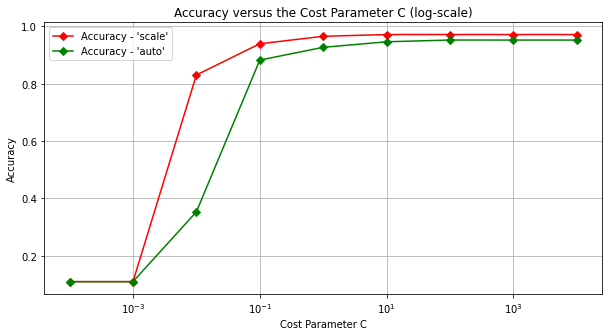

In [4]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, scale_acc,'-gD' ,color='red' , label="Accuracy - 'scale'")
matplot.semilogx(c, auto_acc,'-gD' , label="Accuracy - 'auto'")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

In [3]:
rbf_svc = SVC(C = 10, kernel = 'rbf', gamma = 'scale')

start_train = time.time()
rbf_svc.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = rbf_svc.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)
print('Train time: ', time_train)
print('Test time: ',time_test)
print('Test accuracy = ', score)

Train time:  494.2368412017822
Test time:  320.5989828109741
Test accuracy =  0.9805714285714285


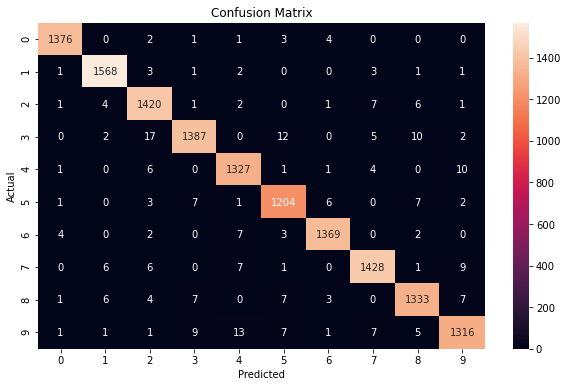

In [4]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()